
# **Explorando la Predisposición a la Diabetes: Un Modelo Predictivo Data-Driven**





# **1. Datos Generales**

## ***1.1 ¿Qué es la Diabetes?***
La diabetes, una de las enfermedades crónicas más prevalentes a nivel mundial, impacta a cientos de millones de personas anualmente. Esta afección crónica implica la pérdida de la capacidad para regular de manera eficaz los niveles de glucosa en la sangre, lo que puede resultar en una disminución significativa de la calidad y esperanza de vida. Tras la descomposición de diversos alimentos en azúcares durante la digestión, estos son liberados en el torrente sanguíneo, activando la liberación de insulina por parte del páncreas. La insulina facilita a las células del cuerpo utilizar esos azúcares como fuente de energía. La diabetes se caracteriza generalmente por una insuficiente producción de insulina o por la incapacidad del cuerpo para utilizarla de manera efectiva.

## ***1.2 ¿Qué problemas implica?***
Complicaciones como enfermedades cardíacas, pérdida de visión, amputación de extremidades inferiores y enfermedad renal están asociadas con niveles crónicamente altos de azúcar en la sangre en personas con diabetes. Aunque no existe una cura definitiva para esta enfermedad, estrategias como la pérdida de peso, una alimentación saludable, actividad física regular y tratamientos médicos pueden atenuar de manera significativa sus efectos en muchos pacientes.

## ***1.3 La importancia de un diagnóstico temprano***
Un diagnóstico temprano puede propiciar cambios en el estilo de vida y un tratamiento más efectivo, subrayando la importancia crítica de los modelos predictivos de riesgo de diabetes como herramientas clave para los profesionales de la salud pública.









# **2. Dataset Utilizado**

El Sistema de Vigilancia de Factores de Riesgo Conductuales (BRFSS, por sus siglas en inglés) constituye una encuesta telefónica de salud recopilada anualmente en Estados Unidos por los Centros para el Control y la Prevención de Enfermedades (CDC). Esta iniciativa abarca respuestas de más de 400.000 estadounidenses cada año, explorando comportamientos de riesgo en salud, condiciones crónicas y la utilización de servicios preventivos desde 1984.

En este proyecto, se empleó un archivo CSV obtenido de Kaggle, el cual representa una reinterpretación del conjunto de datos original. Este último incluye respuestas de 441.455 individuos a la encuesta del año 2015 del BRFSS.
El conjunto de datos resultante, denominado "diabetes_binary_health_indicators_BRFSS2015.csv", se presenta como un conjunto de datos depurado y estructurado, conteniendo 253.680 respuestas a la encuesta BRFSS 2015 de los CDC. La variable objetivo, "Diabetes_binary", establece dos clases: 0 para la ausencia de diabetes y 1 para prediabetes o diabetes. Este conjunto de datos abarca 21 variables características cruciales.






# **3. Definición de la temática**

El dataset detalla la demografía de cada registro (sexo, edad, nivel de educacion e ingresos), estado de salud general, condiciones médicas, acceso a servicios de salud, y hábitos alimenticios y de salud


## ***3.1. Hipótesis***

 Creemos que se identificarán patrones significativos y relaciones entre diversos factores demográficos, conductuales, condiciones crónicas y la presencia de diabetes.


## ***3.2. Objetivos Principales***


1.  Analizar y determinar primeramente la relación existente entre la presencia de diabetes y las variables demográficas de sexo y edad en los registros.
2.  Determinar correlaciones significativas entre la presencia de diabetes y otras variables médicas, económicas, sociales, y conductales.
3.  De hallarlas, identificar y hacer foco en aquellas mas pronunciadas, examinando en detalle su impacto.
4.  Con la información obtenida desarrollar un modelo predictivo que permita calcular la probabilidad de que nuevos perfiles tengan o no diabetes, permitiendo así actuar en forma preventiva y corregir las variables con mayor incidencia.


## ***3.3. Usuarios Finales***

Los usuarios finales del presente trabajo pueden ser tanto médicos como personal jerarquico de instituciones de salud publicas interesados en el diagnostico preventivo y la disminución de la incidencia que tiene la enfermedad a nivel social.

## ***3.4. Líneas Futuras***
 A futuro este trabajo podría ampliarse tomando a consideración una mayor cantidad de variables, y orientarse hacia la identificación de estrategias preventivas específicas, basadas en los hallazgos de la relación entre diabetes y los distintos indicadores.


# **4. Análisis exploratorio de la correlación entre las variables**

Con el fin de lograr un desarrollo mas ordenado y resumir la ejecución de todo el código a un solo click, a partir de este apartado se procede a la carga de los datos y al análisis de los mismos.


## ***4.1. Carga del Dataset a analizar***

Aquí se carga el Dataset que utilizaremos

In [ ]:
from google.colab import drive
import pandas as pd

# Monta Google Drive
drive.mount('/content/gdrive')

# Linkea archivo en unidad de Google Drive
diabetes_indicators= '/content/gdrive/MyDrive/DataScience/PosiblesDatasets/diabetes_indicators.csv'

# Carga el archivo CSV en un DataFrame
df_diabetes = pd.read_csv(diabetes_indicators)

Mounted at /content/gdrive


## ***4.2 Exploración del Dataset y sus atributos***


#### Primeras filas de diabetes_indicators.csv

Veamos cuales son las columnas de nuestro Dataframe y sus primeros datos:

In [ ]:
# Muestra las primeras filas del dataframe
display(df_diabetes.head())

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


#### Columnas, nulos, y tipos de datos

Enlistemos las columnas, ¿Nuestro Dataset tiene nulos? ¿Que tipo de datos contiene?

In [ ]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

En este segmento puede verse que el dataset está compuesto por 23 columnas y 253.680 filas; de las columnas 22 son de formato float64 y una es de formato categoría.

#### Resumen estadístico de diabetes_indicators.csv

¿Qué tal si hacemos un resumen estadístico? Veamos qué cantidad de datos tenemos en cada columna, cual es su promedio, su minimo, su maximo, etc.

In [ ]:
#Muestra resumen estadístico diabetes_indicators.csv
display(df_diabetes.describe())

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


1- La variable de mayor interés para el analisis es "Diabetes_binary", la cual indica en los registros "1.0" la presencia de diabetes
En este cuadro puede verse que su promedio es de 0,139, lo cual indica que aproximadamente el 14% de las personas entrevistadas en la base tienen diabetes

2- Puede verse que si bien la mayoría de los valores son binarios, hay ciertos campos cuyo valor excede al "1.0" que significa "afirmativo", esto es porque son campos cuya utilidad no está en determinar la presencia o no de un factor si no en cuantificar una caracteristica

3- Estos campos antes mencionados son por ejemplo "BMI" (body/mass index, parametro que indica el indice de masa corporal de una persona), "GenHlth" "MentHlth" y "PhysHlth" (que determinan respectivamente el estado de salud general, mental y fisico de una persona) y "Age" "Education" e "Income" (que clasifican a cada persona en grupos acorde a su edad, nivel educativo y poder adquisitivo).

#### Tamaño de diabetes_indicators.csv

¿Cual es su tamaño total en filas? ¿y en columnas?

In [ ]:
# Muestra tamaño del DataFrame
print('Tamaño de diabetes_indicators.csv:', df_diabetes.shape)

Tamaño de diabetes_indicators.csv: (253680, 22)


Podemos ver que nuestro Dataset contiene 253680 registros y 22 columnas.

#### Tipo de datos en cada columna de diabetes_indicators.csv
Revisemos solo los tipos de datos:

In [ ]:
# Muestra los tipos de datos de cada columna
print("\n" "Tipos de datos en diabetes_indicators.csv" "\n")
print(df_diabetes.dtypes)


Tipos de datos en diabetes_indicators.csv

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


Podemos ver que son todos Float64, un formato que incluye enteros y decimales.

#### Cantidad de nulos en diabetes_indicators.csv

In [ ]:
#Muestra cantidad de valores nulos
print("Cantidad de valores nulos en diabetes_indicators.csv" "\n")
print(df_diabetes.isnull().sum())

Cantidad de valores nulos en diabetes_indicators.csv

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


De nuevo, podemos confirmar en este segmento que el dataset utilizado no tiene datos nulos.

## ***4.3. Casos de Diabetes por Edad***

###### El siguiente gráfico de violin desarrollado con Seaborn expresa la cantidad de casos de diabetes para cada grupo etario de la muestra, permitiendo ver en cuales de ellos se encuentra la enfermedad en mayor o menor medida.


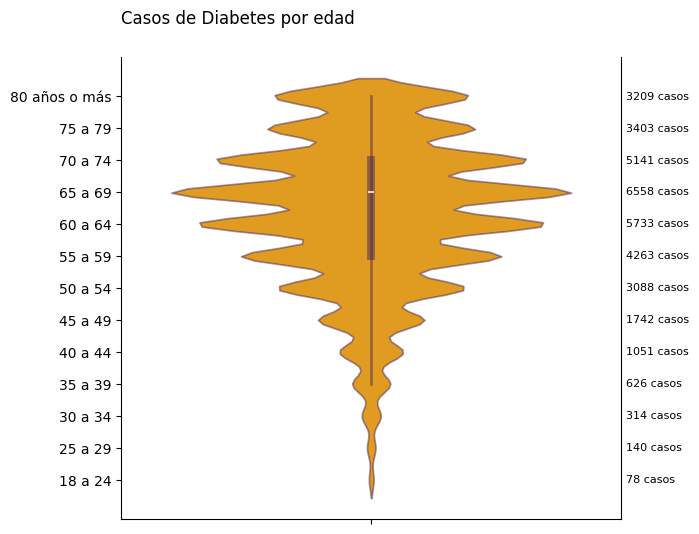

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Mapear las etiquetas en el eje Y
etiquetas_y = {
    1.0: '18 a 24',
    2.0: '25 a 29',
    3.0: '30 a 34',
    4.0: '35 a 39',
    5.0: '40 a 44',
    6.0: '45 a 49',
    7.0: '50 a 54',
    8.0: '55 a 59',
    9.0: '60 a 64',
    10.0: '65 a 69',
    11.0: '70 a 74',
    12.0: '75 a 79',
    13.0: '80 años o más',
}

# Filtrar los datos para incluir solo casos con Diabetes_binary igual a 1.0
df_diabetes_1_filtered = df_diabetes[df_diabetes['Diabetes_binary'] == 1.0]

# Crear un gráfico de violín con Seaborn
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico
ax = sns.violinplot(x="Diabetes_binary", y="Age", data=df_diabetes_1_filtered, color="#FFA500", edgecolor='#4A235A80')

# Ajustar los márgenes izquierdo y derecho
plt.subplots_adjust(left=0.1, right=0.6)

# Establecer las posiciones de las etiquetas en el eje Y
ax.set_yticks(list(etiquetas_y.keys()))
# Establecer las etiquetas deseadas en el eje Y
ax.set_yticklabels(list(etiquetas_y.values()))

# Ocultar los ejes X e Y
ax.set(xlabel=None, ylabel=None)

# Ocultar el nombre de la etiqueta 1.0 en el eje X
ax.set_xticklabels([])

# Establecer el título del gráfico y elevarlo ligeramente
ax.set_title("Casos de Diabetes por edad", loc="Left", pad=24, size=12)

# Añadir el marco del eje X e Y y quitar borde superior y derecho
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Ajustar la posición del recuento de casos más cerca del gráfico
for i, (label, count) in enumerate(zip(etiquetas_y.values(), df_diabetes_1_filtered.groupby('Age').size())):
    # Obtener la posición y del centro de cada rango de edad
    y_pos = list(etiquetas_y.keys())[i]
    # Ajustar la posición x para acercar el texto al gráfico
    ax.text(ax.get_xlim()[1] + 0.01, y_pos, f'{count} casos', ha='left', va='center', color='black', fontsize=8)

plt.show()

##### Como se puede ver el grupo etario donde se encuentran mas casos de diabetes es en el de las personas de entre 55 y 74 años, hallándose la media entre los 65 y los 69 años. Por otro lado, el 95% de los casos de diabetes registrados corresponden a personas de mas de 35 años.


## ***4.4. Incidencia del sexo en la presencia de diabetes***

###### Este gráfico de barras apiladas fue desarrollado con Matplotlib y expresa los casos de estudio de la muestra clasificados por sexo, a la vez que diferencia el porcentaje de la misma que tiene diabetes del que no.



De esta manera, nos permite identificar si son las mujeres o en cambio los hombres quienes tienen una tendencia mayor a esta enfermedad.



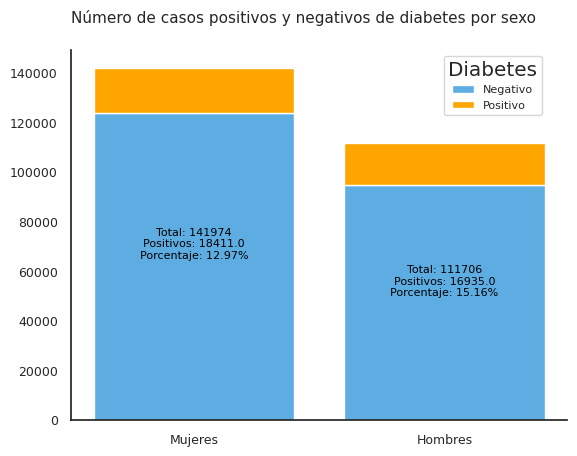

In [ ]:
import matplotlib.pyplot as plt

# Calcular el conteo total de casos y el conteo de casos positivos por sexo
casos_totales = df_diabetes.groupby('Sex').size()
casos_positivos = df_diabetes.groupby('Sex')['Diabetes_binary'].sum()

# Calcular la proporción de casos positivos por sexo
proporciones = df_diabetes.groupby('Sex')['Diabetes_binary'].mean()

# Reemplazar las etiquetas "0.0" y "1.0" por "Mujeres" y "Hombres"
sexo_labels = {0.0: 'Mujeres', 1.0: 'Hombres'}
casos_totales.index = casos_totales.index.map(sexo_labels)
casos_positivos.index = casos_positivos.index.map(sexo_labels)
proporciones.index = proporciones.index.map(sexo_labels)

# Crear un gráfico de barras apiladas
fig, ax = plt.subplots()

# Graficar barras para casos negativos
ax.bar(casos_totales.index, casos_totales.values - casos_positivos.values, color='#5DADE2', label='Negativo')

# Graficar barras para casos positivos
ax.bar(casos_totales.index, casos_positivos.values, bottom=casos_totales.values - casos_positivos.values, color='#FFA500', label='Positivo')

plt.xlabel('')
plt.title('Número de casos positivos y negativos de diabetes por sexo', loc='left', pad=20, size=11)
plt.legend(title='Diabetes', loc='upper left', bbox_to_anchor=(0.74, 1), fontsize=8)  # Ajustar la posición y el tamaño

# Mostrar el porcentaje de casos positivos en cada barra
for i, (total, positivos, proporc) in enumerate(zip(casos_totales, casos_positivos, proporciones)):
    ax.text(i, total / 2, f'Total: {total}\nPositivos: {positivos}\nPorcentaje: {proporc:.2%}', ha='center', va='center', color='black', fontsize=8)

# Eliminar el marco derecho y superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Ajustar el tamaño de la tipografía en los ejes
ax.tick_params(axis='both', labelsize=9)

plt.show()

Si realizaramos un conteo convencional de los casos positivos nos quedaríamos con el dato de que son mayoría los casos femeninos de diabetes.

Sin embargo, la visualización nos salva de cometer el equivoco de creer que tienen las mujeres una tendencia mayor a tener la enfermedad, ya que se corrobora que son muchas mas las mujeres que los hombres tenidos en cuenta en la muestra.

Calculado sobre el total de los individuos de cada sexo, es mayor el porcentaje de hombres con diabetes por un 2,19%


## ***4.5. Mapa de correlación con otros indicadores***

###### Para indagar en la relación que hay entre la presencia de diabetes y otros indicadores -tanto de salud como sociales y de conducta-, se realizó con Seaborn un mapa de calor que indica la correlación entre las variables.


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0, 0.5, 'Diabetes_binary'),
  Text(0, 1.5, 'HighBP'),
  Text(0, 2.5, 'HighChol'),
  Text(0, 3.5, 'CholCheck'),
  Text(0, 4.5, 'BMI'),
  Text(0, 5.5, 'Smoker'),
  Text(0, 6.5, 'Stroke'),
  Text(0, 7.5, 'HeartDiseaseorAttack'),
  Text(0, 8.5, 'PhysActivity'),
  Text(0, 9.5, 'Fruits'),
  Text(0, 10.5, 'Veggies'),
  Text(0, 11.5, 'HvyAlcoholConsump'),
  Text(0, 12.5, 'AnyHealthcare'),
  Text(0, 13.5, 'NoDocbcCost'),
  Text(0, 14.5, 'GenHlth'),
  Text(0, 15.5, 'MentHlth'),
  Text(0, 16.5, 'PhysHlth'),
  Text(0, 17.5, 'DiffWalk'),
  Text(0, 18.5, 'Sex'),
  Text(0, 19.5, 'Age'),
  Text(0, 20.5, 'Education'),
  Text(0, 21.5, 'Income')])

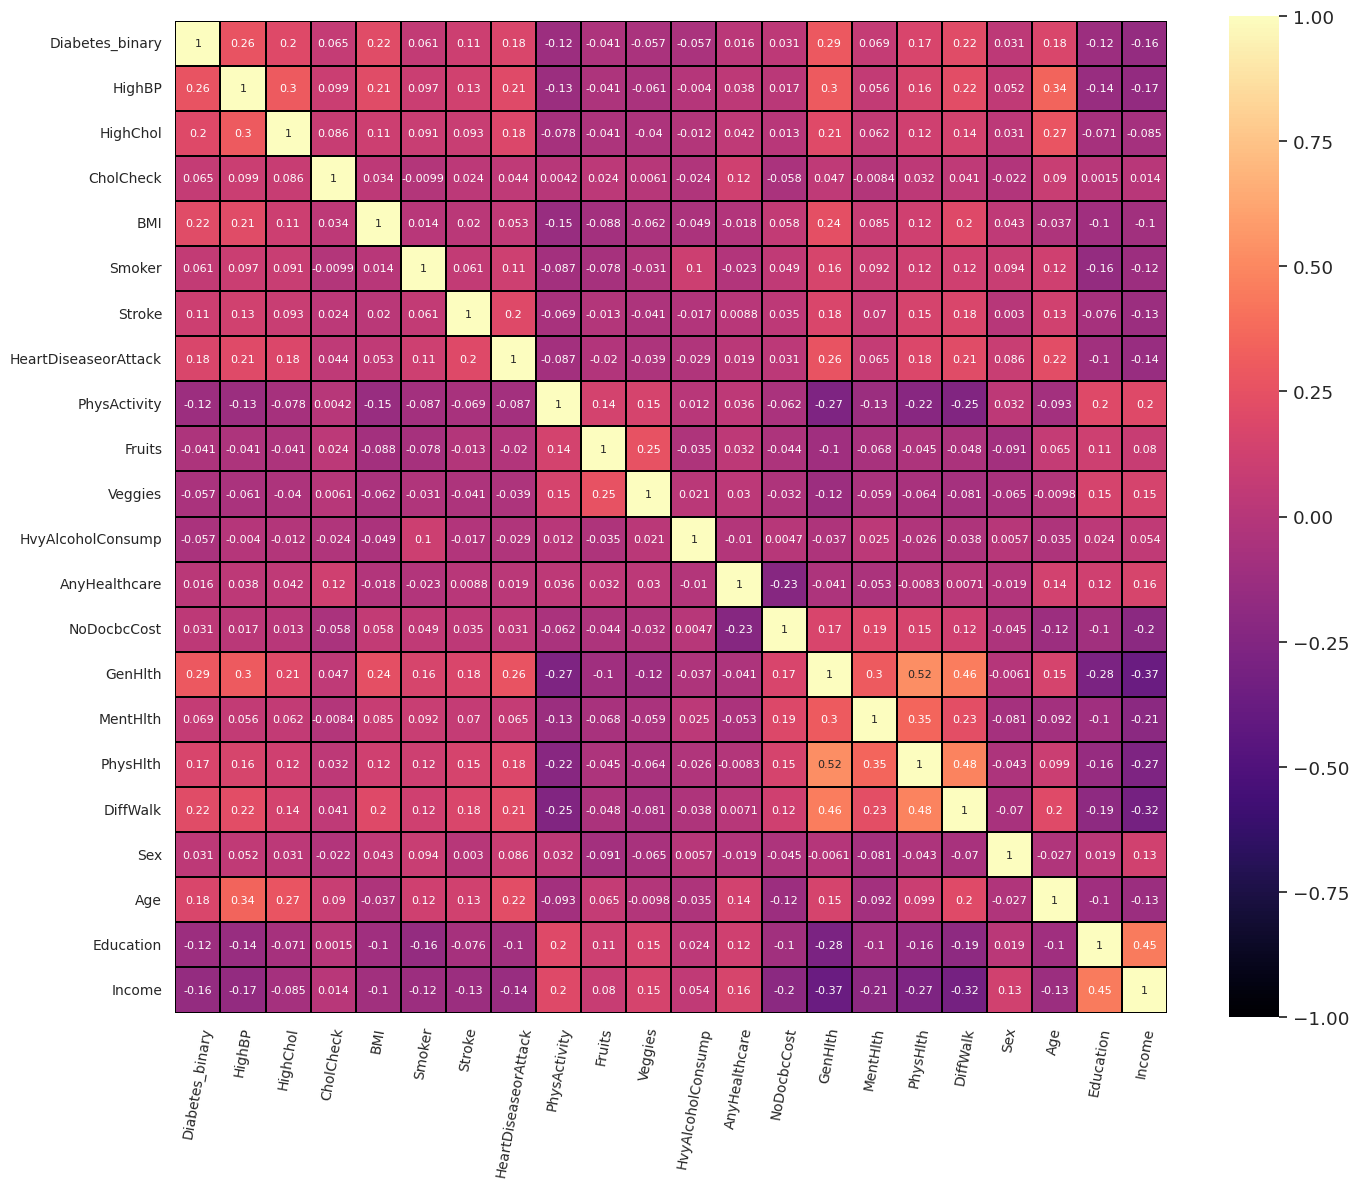

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,13))
heatmap = sns.heatmap(df_diabetes.corr(), annot=True, square=True, vmin=-1, vmax=1, center=0, linewidths=0.1, linecolor='black', cmap="magma", annot_kws={'size': 8})
plt.xticks(rotation= 80, fontsize= 10)
plt.yticks(fontsize= 10)

###### Los recuadros cuyo color tiende al amarillo indican una relación positiva entre las variables, en la cual cuando una crece la otra tiende también a crecer

Los recuadros con signo negativo cuyo color tiende al negro indican una relación negativa entre las variables, en la cual cuando una crece la otra tiende a decrecer.

Con este gráfico se pudieron evidenciar las variables mas relacionadas a la presencia o no de diabetes. Esto sirve para orientar el resto del análisis y saber qué factores son relevantes y merecen ser puestos bajo la lupa.

## ***4.6. Relación entre la Diabetes y otras condiciones médicas***
### Coincidencia entre diabetes e hipertensión
El mapa de calor evidenció una relación positiva entre diabetes e hipertensión, es decir, en presencia de una de las variables es mas probable que se encuentre también la otra.

Con el fin de comparar la cantidad de casos positivos de ambas variables y de determinar el porcentaje de casos que comparten, se realiza un Diagrama de Venn con Matplotlib.

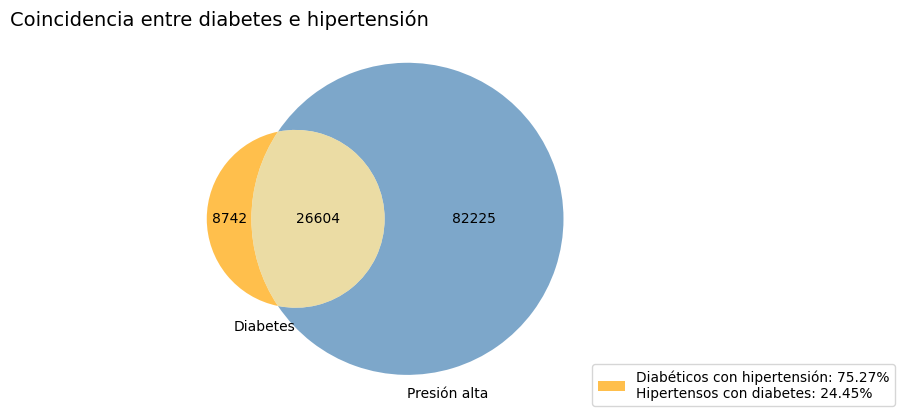

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Obtener conjuntos
diabetes_set = set(df_diabetes[df_diabetes['Diabetes_binary'] == 1].index)
high_bp_set = set(df_diabetes[df_diabetes['HighBP'] == 1].index)

# Calcular casos comunes
common_cases = len(diabetes_set & high_bp_set)

# Calcular porcentajes
total_diabetics = len(df_diabetes[df_diabetes['Diabetes_binary'] == 1])
total_high_bp = len(df_diabetes[df_diabetes['HighBP'] == 1])

percent_diabetes_with_high_bp = common_cases / total_diabetics * 100
percent_high_bp_with_diabetes = common_cases / total_high_bp * 100

# Crear gráfico de Venn
fig, ax = plt.subplots()

venn_diabetes_high_bp = venn2(subsets=(total_diabetics - common_cases, total_high_bp - common_cases, common_cases),
                               set_labels=('Diabetes', 'Presión alta'),
                               set_colors=['orange', 'steelblue'],
                               alpha=0.7, ax=ax)

# Ajustar tamaño de la fuente
font_size = 10
for text in venn_diabetes_high_bp.set_labels:
    text.set_fontsize(font_size)

for text in venn_diabetes_high_bp.subset_labels:
    text.set_fontsize(font_size)

# Ajustar la posición y tamaño de la leyenda
legend_text = f'Diabéticos con hipertensión: {percent_diabetes_with_high_bp:.2f}%\nHipertensos con diabetes: {percent_high_bp_with_diabetes:.2f}%'
ax.legend([legend_text], loc='center left', bbox_to_anchor=(1, 0.05), bbox_transform=ax.transAxes, borderaxespad=0., fontsize=font_size - 0.1)

# Ajustar la posición del título
ax.title.set_position([0.1, 2])

plt.title('Coincidencia entre diabetes e hipertensión', size=14)
plt.show()



Gracias a este gráfico podemos ver tres cosas:

1.   Son muchos mas los casos de hipertensión que los de diabetes.
2.   Un cantidad considerable de individuos tiene ambas enfermedades
3.   La gran mayoría de los diabéticos padecen hipertensión, tres de cada cuatro (75%), en cambio solo uno de cada cuatro hipertensos padece diabetes (24,4%)





## ***4.7. Diabetes y diferencias económico/sociales***
### Relación entre diabetes y nivel de ingreso

Otra relación que llama la atención es la de la presencia de diabetes y el nivel de ingresos de los individuos. Para saber mas de ella se realizó un histograma que toma en consideración la suma de los casos de cada nivel de ingresos y cuantos de los individuos de cada categoría tienen diabetes.

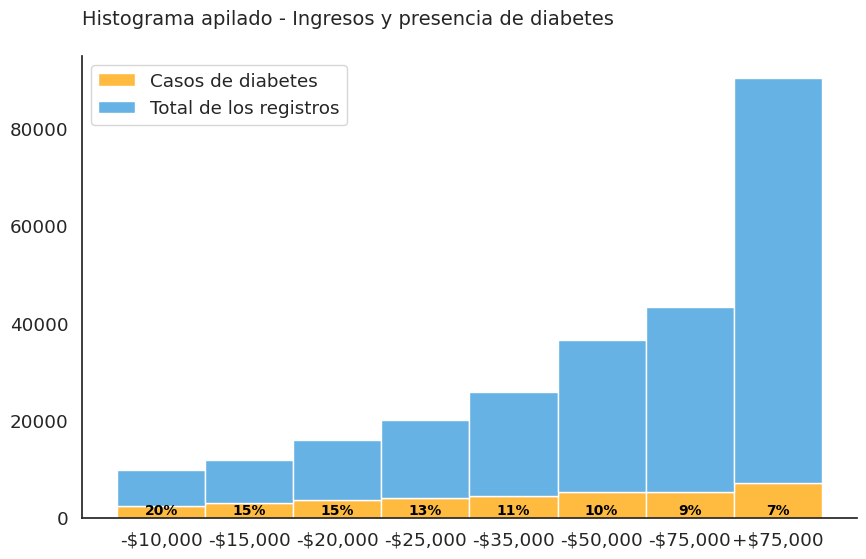

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filtrar solo los registros con Diabetes_binary igual a 1
diabetes_positive = df_diabetes[df_diabetes['Diabetes_binary'] == 1]

# Mapeo de etiquetas para el eje X
income_labels = {
    1: '-$10,000',
    2: '-$15,000',
    3: '-$20,000',
    4: '-$25,000',
    5: '-$35,000',
    6: '-$50,000',
    7: '-$75,000',
    8: '+$75,000'
}

# Reemplazar las etiquetas de Income y convertir a categoría
df_diabetes['Income_Label'] = df_diabetes['Income'].map(income_labels)
df_diabetes['Income_Label'] = pd.Categorical(df_diabetes['Income_Label'], categories=income_labels.values(), ordered=True)

# Configurar el estilo de Seaborn
sns.set(style="white", font_scale=1.2)

# Crear un histograma apilado utilizando histplot
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura según sea necesario (se ha reducido la altura)

# Utilizar sns.histplot para mostrar el histograma apilado de registros y registros de diabetes
sns.histplot(data=df_diabetes, x='Income_Label', hue='Diabetes_binary', multiple="stack", palette={0:'#3498db', 1:'#FFA500'}, kde=False)

# Configurar etiquetas y título
plt.xlabel('')  # Dejar el eje X sin etiqueta
plt.ylabel('')  # Dejar el eje Y sin etiqueta
plt.title('Histograma apilado - Ingresos y presencia de diabetes', loc='left', size=14, y=1.05)  # Ajustar la distancia del título
# Ajustar la posición del título
ax.title.set_position([0.1, 2])

# Añadir porcentaje en el segmento de "diabetes_positive"
percentages = diabetes_positive['Income_Label'].value_counts(normalize=True)
for val, percent in zip(income_labels.values(), percentages):
    plt.text(val, 0, f'{percent:.0%}', ha='center', va='bottom', color='black', fontweight='bold', size=10)

# Añadir leyenda
plt.legend(title=None, labels=['Casos de diabetes', 'Total de los registros'])

# Ocultar el grid
plt.grid(False)

# Quitar los marcadores en el eje Y y X
sns.despine()

# Mostrar el histograma apilado
plt.show()



De este gráfico se pueden derivar dos conclusiones:

*   Los datos se tomaron de una muestra compuesta mayoritariamente por individuos de buen poder adquisitivo, ya que la cantidad de registros de la base de datos incrementa entre categorías a medida que asciende el ingreso.

*   A mayor poder adquisitivo, es proporcionalmente menor la cantidad de casos de diabetes. Podria cuestionarse si la causa de ello se debe a la posibilidad de acceso a una alimentacion mas equilibrada, o la pertenencia a un segmento poblacional de mayor nivel educativo, y por lo tanto mejor informado y mas consciente de sus habitos alimenticios.


## ***4.8. Hábitos y diabetes - Incidencia Conductual***


Resulta interesante preguntarse cuanta incidencia tienen los habitos en la presencia o no de diabetes, para así saber que tan prevenible es sosteniendo un estilo de vida saludable.

Para la realización de esta visualización se consideraron cuatro variables relacionadas a la conducta de los individuos de la muestra: el consumo regular de frutas, el consumo regular de verduras, la realización de actividad física y que fueran o no fumadores.

Se tomó una muestra aleatoria de 6600 registros donde esas variables fueran positivas y otra muestra donde fueran negativas; y de cada una de ellas se tomaron 100 registros para la realización de los gráficos. La muestra es de 6600 por ser un numero 'redondo' cercano a 6694, que es la cantidad de registros con "malos habitos". Si seleccionase un numero de registros mayor se incrementaria solamente la base muestral de "buenos habitos", pero no así la de "malos habitos"

Puede verse así la cantidad de casos de diabetes en un recorte de población que realiza ejercicio, se alimenta bien y no fuma, y compararse con un recorte de población que hace todo lo contrario.

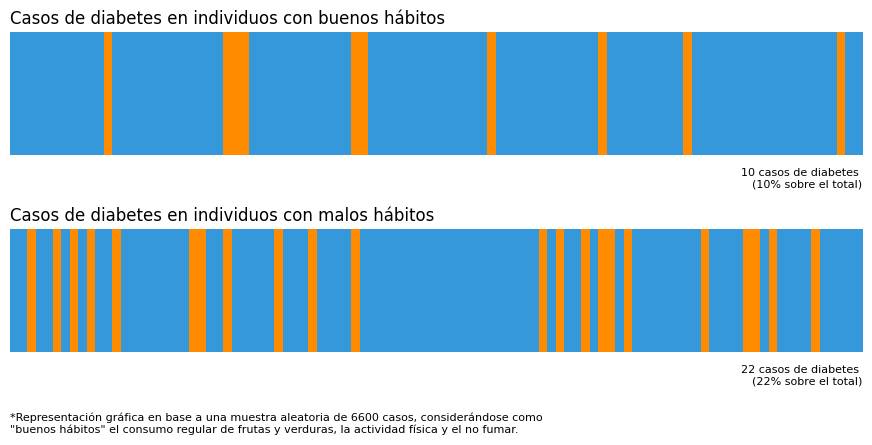

In [ ]:
  #Genera dos gráficos de barra donde cada barra representa un registro y el color diferencia entre los registros de 'Diabetes_binary' con valor "0" y los registros con valor "1".
  #Selecciona aleatoriamente 6600 registros donde 'PhysActivity', 'Fruits', 'Veggies', y 'Smoker' son todos "Si" o "No" para el muestreo. De esos 6600 toma 100 que cumplan las condiciones para realizar las visualizaciones.


def my_plot_diabetes_binary_bars(df_diabetes, sample_size=100, total_sample_size=6600, figsize=(11, 5)):

    # Convertir el índice a tipo datetime si no lo es
    if not isinstance(df_diabetes.index, pd.DatetimeIndex):
        df_diabetes.index = pd.to_datetime(df_diabetes.index)

    # Seleccionar registros donde 'PhysActivity', 'Fruits', 'Veggies', y 'Smoker' son todos "1"
    selected_rows_1 = df_diabetes[(df_diabetes['PhysActivity'] == 1) &
                                  (df_diabetes['Fruits'] == 1) &
                                  (df_diabetes['Veggies'] == 1) &
                                  (df_diabetes['Smoker'] == 0)].head(total_sample_size)

    # Seleccionar registros donde 'PhysActivity', 'Fruits', 'Veggies', y 'Smoker' son todos "0"
    selected_rows_0 = df_diabetes[(df_diabetes['PhysActivity'] == 0) &
                                  (df_diabetes['Fruits'] == 0) &
                                  (df_diabetes['Veggies'] == 0) &
                                  (df_diabetes['Smoker'] == 1)].head(total_sample_size)

    # Seleccionar aleatoriamente 100 registros de la muestra de 6600
    selected_rows_1 = selected_rows_1.sample(n=sample_size, random_state=42)
    selected_rows_0 = selected_rows_0.sample(n=sample_size, random_state=42)

 # Creamos la figura y sus ejes
    fig, axes = plt.subplots(2, 1, figsize=figsize, sharex=True)

    # Ajuste para agregar espacio en blanco sobre el título del primer gráfico
    plt.subplots_adjust(top=0.85)

    # Recorremos los registros y creamos las barras diferenciando por color en el primer gráfico
    count_diabetes_1 = int(selected_rows_1['Diabetes_binary'].sum())
    total_samples_1 = len(selected_rows_1)
    for i, (_, row) in enumerate(selected_rows_1.iterrows()):
        color = '#3498db' if row['Diabetes_binary'] == 0 else '#FF8C00'
        axes[0].bar(i, 1, color=color, width=1)

    # Recorremos los registros y creamos las barras diferenciando por color en el segundo gráfico
    count_diabetes_0 = int(selected_rows_0['Diabetes_binary'].sum())
    total_samples_0 = len(selected_rows_0)
    for i, (_, row) in enumerate(selected_rows_0.iterrows()):
        color = '#3498db' if row['Diabetes_binary'] == 0 else '#FF8C00'
        axes[1].bar(i, 1, color=color, width=1)

    # Etiquetas y leyendas
    axes[1].set_xticks(range(min(len(selected_rows_0), len(selected_rows_1))))
    axes[1].set_xticklabels([])
    axes[0].set_ylabel('Registros')
    axes[1].set_ylabel('Registros')

    # Títulos de los subgráficos
    axes[0].set_title('Casos de diabetes en individuos con buenos hábitos', loc='left')
    axes[1].set_title('Casos de diabetes en individuos con malos hábitos', loc='left')

    # Ajustes de diseño para eliminar la separación entre columnas y eliminar ejes y marcas
    axes[0].set_xlim(-0.5, min(len(selected_rows_1), len(selected_rows_0)) - 0.5)
    axes[0].set_ylim(0, 1)
    axes[0].spines['right'].set_visible(False)
    axes[0].spines['top'].set_visible(False)
    axes[0].spines['bottom'].set_visible(False)
    axes[0].spines['left'].set_visible(False)
    axes[0].xaxis.tick_bottom()
    axes[0].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
    axes[0].yaxis.set_visible(False)

    axes[1].set_xlim(-0.5, min(len(selected_rows_1), len(selected_rows_0)) - 0.5)
    axes[1].set_ylim(0, 1)
    axes[1].spines['right'].set_visible(False)
    axes[1].spines['top'].set_visible(False)
    axes[1].spines['bottom'].set_visible(False)
    axes[1].spines['left'].set_visible(False)
    axes[1].xaxis.tick_bottom()
    axes[1].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
    axes[1].yaxis.set_visible(False)

    # Añadir leyenda debajo y a la derecha de cada gráfico
    axes[0].text(1, -0.1, f'{len(selected_rows_1[selected_rows_1["Diabetes_binary"] == 1])} casos de diabetes \n'
                     f'({((selected_rows_1["Diabetes_binary"].sum() / len(selected_rows_1)) * 100):.0f}% sobre el total)',
             transform=axes[0].transAxes, horizontalalignment='right', verticalalignment='top',
             color='black', fontsize=8)
    axes[1].text(1, -0.1, f'{len(selected_rows_0[selected_rows_0["Diabetes_binary"] == 1])} casos de diabetes \n'
                     f'({((selected_rows_0["Diabetes_binary"].sum() / len(selected_rows_0)) * 100):.0f}% sobre el total)',
             transform=axes[1].transAxes, horizontalalignment='right', verticalalignment='top',
             color='black', fontsize=8)

    # Añadir leyenda debajo de ambos gráficos
    fig.text(0.125, -0.01, '*Representación gráfica en base a una muestra aleatoria de 6600 casos, considerándose como\n"buenos hábitos" el consumo regular de frutas y verduras, la actividad física y el no fumar.',
             horizontalalignment='left', verticalalignment='top', color='black', fontsize=8)

    # Ajustes de diseño para separar los gráficos
    plt.subplots_adjust(hspace=0.6)  # Aumenta el espacio vertical entre los subgráficos

    # Ajuste para acercar el título del primer gráfico al cuerpo
    plt.subplots_adjust(top=0.75)

    # Mostrar la gráfica
    plt.show()

# Uso del código
# Suponiendo que df_diabetes es tu DataFrame
my_plot_diabetes_binary_bars(df_diabetes)




Gracias al gráfico anterior podemos ver que las personas que fuman, no realizan actividad física, y no tienen una dieta equilibrada, son un 12% mas propensas a tener diabetes. En un grupo de 100 personas que mantienen estos habitos habrá 12 personas mas que estarán enfermas en relación a otro grupo de hábitos mas sanos.

# **5. Feature Selection**

En esta sección del trabajo, habiendo previamente analizado las principales correlaciones observadas, se avanzará con una necesaria reducción de la dimensionalidad del Dataset que permita utilizarlo posteriormente a fines predictivos.

## ***5.1 Revisión de la varianza y media de cada variable***

Primeramente observamos la varianza y media de las variables para tener una idea de su estado antes de aplicar el método de Feature Selection escogido. Recordemos que si alguna variable tiene una media y una dispersion muy alejadas del resto tendrá una presencia desproporcional y generará una distorsión en el predictivo.

In [ ]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
df_diabetes.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


<ipython-input-17-2a2fff78580e>:4: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_diabetes.var(axis=0)


Diabetes_binary          0.119920
HighBP                   0.244960
HighChol                 0.244243
CholCheck                0.035937
BMI                     43.674839
Smoker                   0.246771
Stroke                   0.038925
HeartDiseaseorAttack     0.085315
PhysActivity             0.184186
Fruits                   0.231976
Veggies                  0.153018
HvyAlcoholConsump        0.053039
AnyHealthcare            0.046552
NoDocbcCost              0.077091
GenHlth                  1.141644
MentHlth                54.950296
PhysHlth                76.002675
DiffWalk                 0.139925
Sex                      0.246442
Age                      9.328262
Education                0.971751
Income                   4.289652
dtype: float64

In [ ]:
print('-------------------------')
print('Media de cada variable')
print('-------------------------')
df_diabetes.mean(axis=0)

-------------------------
Media de cada variable
-------------------------


<ipython-input-18-9d550c54e3cd>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_diabetes.mean(axis=0)


Diabetes_binary          0.139333
HighBP                   0.429001
HighChol                 0.424121
CholCheck                0.962670
BMI                     28.382364
Smoker                   0.443169
Stroke                   0.040571
HeartDiseaseorAttack     0.094186
PhysActivity             0.756544
Fruits                   0.634256
Veggies                  0.811420
HvyAlcoholConsump        0.056197
AnyHealthcare            0.951053
NoDocbcCost              0.084177
GenHlth                  2.511392
MentHlth                 3.184772
PhysHlth                 4.242081
DiffWalk                 0.168224
Sex                      0.440342
Age                      8.032119
Education                5.050434
Income                   6.053875
dtype: float64

## ***5.2 Aplicando PCA***

Se aplica PCA a todas las columnas salvo a Diabetes_Binary (variable objetivo) y a Income_Label, que fue una columna generada anteriormente para una visualización. De esta manera se reduce la dimensionalidad del dataset y se acota a las 12 variables mas influyentes en la presencia de diabetes.

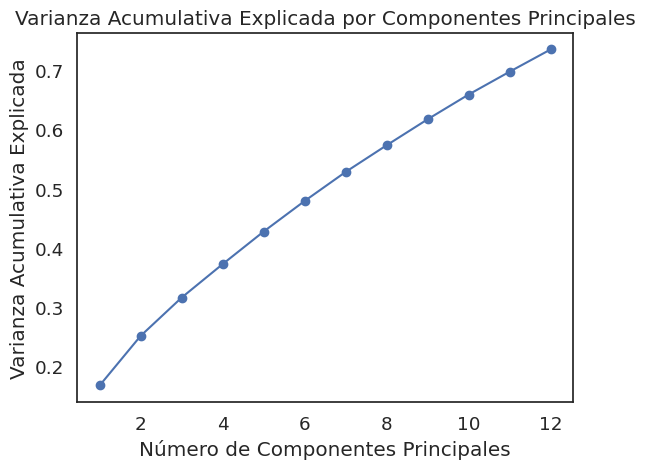

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Se aplica PCA a todas las columnas del DataFrame excepto las columnas 'Diabetes_binary' e 'Income_Label'
X = df_diabetes.drop(['Diabetes_binary', 'Income_Label'], axis=1)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elegir el número de componentes deseados
n_components = 12
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Visualizar la Varianza Explicada
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.plot(range(1, n_components + 1), cumulative_variance, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulativa Explicada')
plt.title('Varianza Acumulativa Explicada por Componentes Principales')
plt.show()

## ***5.3 Caracteristicas principales***
Se observan cuales son las caracteristicas principales que filtró el PCA y su incidencia en un gráfico de barras

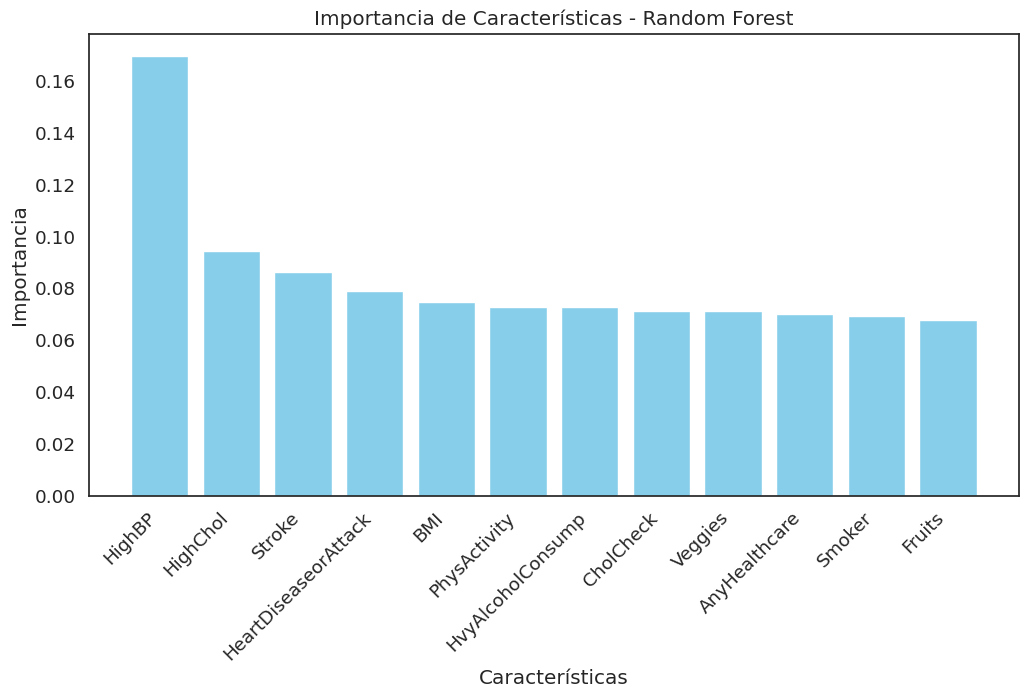

In [ ]:
# Visualizar la Importancia de las principales caracteristicas
feature_importances = model.feature_importances_
feature_importances = rf_model.feature_importances_
sorted_idx = feature_importances.argsort()[::-1]
sorted_features = [X.columns[i] for i in sorted_idx]

plt.figure(figsize=(12, 6))
plt.bar(sorted_features, feature_importances[sorted_idx], color='skyblue')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de Características - Random Forest')
plt.xticks(rotation=45, ha='right')
plt.show()

print("\n" + "="*40 + "\n")

## ***5.4 Volvemos a ver varianza y media de las variables***
Luego de haber aplicado PCA volvemos a ver varianza y media para observar así si se corrigió o disminuyó la diferencia entre las variables

In [ ]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
X_pca.var(axis=0)


-------------------------
Varianza de cada variable
-------------------------


array([3.50973125, 1.76330783, 1.36086041, 1.19020638, 1.15770356,
       1.08711825, 1.03253503, 0.9482355 , 0.92383957, 0.87999633,
       0.81163725, 0.79210457])

In [ ]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
X_pca.mean(axis=0)

----------------------
Media de cada variable
----------------------


array([-6.17454334e-17,  1.70347110e-16, -9.43297877e-17,  5.52131136e-17,
        1.06698350e-18,  1.40606149e-16,  2.53371380e-17, -3.06501732e-17,
       -8.63013715e-17, -5.42752360e-17,  4.01407682e-17,  1.31692372e-16])

Vemos que el PCA fue efectivo y que se normalizó en gran medida la diferencia entre las variables, por lo que podemos avanzar a realizar un recorte de los datos para entrenarlos.

# **6. Aplicando un algoritmo predictivo**

En esta sección se terminará de definir el conjunto de datos a entrenar y los parametros con los cuales se evaluará el éxito del modelo predictivo. Finalmente, se aplicará Random Forest sobre los datos de entrenamiento y se examinará su tasa de acierto a la hora de predecir casos positivos y negativos de diabetes.

## ***6.1 Se define el conjunto de datos a entrenar***

Se define el conjunto de datos a entrenar, asignandose el 80% de los datos para entrenamiento (X_train y y_train) y el 20% restante para pruebas.

Se obtienen así los conjuntos de datos divididos (X_train, X_test, y_train y y_test), que se pueden utilizar para entrenar un modelo de RandomForestClassifier y evaluar su rendimiento.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# X_pca es el conjunto de datos después de aplicar PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, df_diabetes['Diabetes_binary'], test_size=0.2, random_state=42)


NameError: name 'X_pca' is not defined

## ***6.2 Se definen los parámetros con los que se evaluará el modelo***
Aquí se define por qué parametros se evaluará al modelo. En este caso se evaluará al modelo por exactitud, y precisión. Los modelos Classification Report y Confusion Matrix permiten también examinar los resultados mas profundamente por ejemplo a través del Recall de cada caso (que porcentaje de los registros 1 y 0 fueron identificados correctamente) y la cantidad de predicciones correctas e incorrectas hechas por el modelo (Confusión Matrix).

In [ ]:
# Definición de la función para evaluar modelos
def evaluate_model(model, predictions, y_true):
    accuracy = accuracy_score(y_true, predictions)
    print(f"Accuracy: {accuracy:.2f}\n")

    print("Classification Report:")
    print(classification_report(y_true, predictions))

    print("Confusion Matrix:")
    print(confusion_matrix(y_true, predictions))


## ***6.3 Se aplica Random Forest sobre los datos de entrenamiento y se evalua su rendimiento***

En este segmento se aplica Random Forest sobre los datos de entrenamiento y se corre la funcion antes definida para evaluar los resultados del modelo y su capacidad predictiva.

In [ ]:
from sklearn.ensemble import RandomForestClassifier


X = df_diabetes.drop(['Diabetes_binary', 'Income_Label'], axis=1)  # Elimina 'Diabetes_binary' y 'Income_label'
y = df_diabetes['Diabetes_binary']  # Selecciona la variable objetivo

model = RandomForestClassifier()
model.fit(X, y)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluar Random Forest
print("Random Forest:")
evaluate_model(rf_model, rf_predictions, y_test)
print("\n" + "="*40 + "\n")

Como podemos ver a partir del reporte, la exactitud del modelo es de un 86%; tuvo una precisión del 88% a la hora de predecir casos negativos y de 47% a la hora de predecir casos positivos


# **7. Anexo - Conexión con API de datos médicos**

En esta sección se establece conexión con una API de datos médicos del gobierno de los Estados Unidos y se realiza un análisis exploratorio de los mismos.

In [ ]:
import requests
import json
import requests
import pandas as pd

url = "https://www.healthit.gov/data/open-api?source=hospital-mu-public-health-measures.csv"

respuesta = requests.get(url)

print(respuesta)

<Response [200]>


In [ ]:
respuesta.text

'[\n    {\n        "region": "Alabama",\n        "region_code": "AL",\n        "period": "2013",\n        "atleast_one_measure": "0.9",\n        "immunization_measure": "0.73",\n        "reportable_lab_results_measure": "0.1",\n        "syndromic_surveillance_measure": "0.16",\n        "registry_measure": "",\n        "stage_2_hospitals_all_measures": "0",\n        "stage_1_hospitals_all_measures": "0"\n    },\n    {\n        "region": "Alabama",\n        "region_code": "AL",\n        "period": "2014",\n        "atleast_one_measure": "0.9",\n        "immunization_measure": "0.84",\n        "reportable_lab_results_measure": "0.41",\n        "syndromic_surveillance_measure": "0.5",\n        "registry_measure": "",\n        "stage_2_hospitals_all_measures": "0.96",\n        "stage_1_hospitals_all_measures": "0.17"\n    },\n    {\n        "region": "Alabama",\n        "region_code": "AL",\n        "period": "2015",\n        "atleast_one_measure": "",\n        "immunization_measure": "0.96"

In [ ]:
texto = respuesta.text
json.loads(texto)

[{'region': 'Alabama',
  'region_code': 'AL',
  'period': '2013',
  'atleast_one_measure': '0.9',
  'immunization_measure': '0.73',
  'reportable_lab_results_measure': '0.1',
  'syndromic_surveillance_measure': '0.16',
  'registry_measure': '',
  'stage_2_hospitals_all_measures': '0',
  'stage_1_hospitals_all_measures': '0'},
 {'region': 'Alabama',
  'region_code': 'AL',
  'period': '2014',
  'atleast_one_measure': '0.9',
  'immunization_measure': '0.84',
  'reportable_lab_results_measure': '0.41',
  'syndromic_surveillance_measure': '0.5',
  'registry_measure': '',
  'stage_2_hospitals_all_measures': '0.96',
  'stage_1_hospitals_all_measures': '0.17'},
 {'region': 'Alabama',
  'region_code': 'AL',
  'period': '2015',
  'atleast_one_measure': '',
  'immunization_measure': '0.96',
  'reportable_lab_results_measure': '0.93',
  'syndromic_surveillance_measure': '0.97',
  'registry_measure': '0.04',
  'stage_2_hospitals_all_measures': '',
  'stage_1_hospitals_all_measures': ''},
 {'region'

In [ ]:
jsondata = json.loads(texto)
df_medico = pd.DataFrame.from_dict(jsondata)
df_medico.head()

,region,region_code,period,atleast_one_measure,immunization_measure,reportable_lab_results_measure,syndromic_surveillance_measure,registry_measure,stage_2_hospitals_all_measures,stage_1_hospitals_all_measures
0,Alabama,AL,2013,0.9,0.73,0.1,0.16,,0,0
1,Alabama,AL,2014,0.9,0.84,0.41,0.5,,0.96,0.17
2,Alabama,AL,2015,,0.96,0.93,0.97,0.04,,
3,Alaska,AK,2013,1,0.93,0.07,0,,0,0
4,Alaska,AK,2014,0.89,0.92,0.31,0.31,,1,0


In [ ]:
df_medico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   region                          157 non-null    object
 1   region_code                     156 non-null    object
 2   period                          156 non-null    object
 3   atleast_one_measure             156 non-null    object
 4   immunization_measure            156 non-null    object
 5   reportable_lab_results_measure  156 non-null    object
 6   syndromic_surveillance_measure  156 non-null    object
 7   registry_measure                156 non-null    object
 8   stage_2_hospitals_all_measures  156 non-null    object
 9   stage_1_hospitals_all_measures  156 non-null    object
dtypes: object(10)
memory usage: 12.4+ KB


In [ ]:
display(df_medico.describe())

,region,region_code,period,atleast_one_measure,immunization_measure,reportable_lab_results_measure,syndromic_surveillance_measure,registry_measure,stage_2_hospitals_all_measures,stage_1_hospitals_all_measures
count,157,156,156,156,156,156,156,156,156,156
unique,53,52,3,37,64,72,74,15,37,18
top,Alabama,AL,2013,,1,0,0.06,,0,0
freq,3,3,52,52,16,7,7,104,53,72


In [ ]:
print('Tamaño de df_medico:', df_medico.shape)

Tamaño de df_medico: (157, 10)


In [ ]:
print("\n" "Tipos de datos en df_medico" "\n")
print(df_medico.dtypes)


Tipos de datos en df_medico

region                            object
region_code                       object
period                            object
atleast_one_measure               object
immunization_measure              object
reportable_lab_results_measure    object
syndromic_surveillance_measure    object
registry_measure                  object
stage_2_hospitals_all_measures    object
stage_1_hospitals_all_measures    object
dtype: object


In [ ]:
print("Cantidad de valores nulos en df_medico" "\n")
print(df_medico.isnull().sum())

Cantidad de valores nulos en df_medico

region                            0
region_code                       1
period                            1
atleast_one_measure               1
immunization_measure              1
reportable_lab_results_measure    1
syndromic_surveillance_measure    1
registry_measure                  1
stage_2_hospitals_all_measures    1
stage_1_hospitals_all_measures    1
dtype: int64


# **8. Data Wrangling**

En esta sección se continua con la búsqueda de nulos, faltantes, duplicados y outliers.

In [ ]:
# Exploramos el dataset en busca de datos nulos
print("Cantidad de valores nulos en df_diabetes:")
print(df_diabetes.isnull().sum())

Cantidad de valores nulos en df_diabetes:
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Income_Label            0
dtype: int64


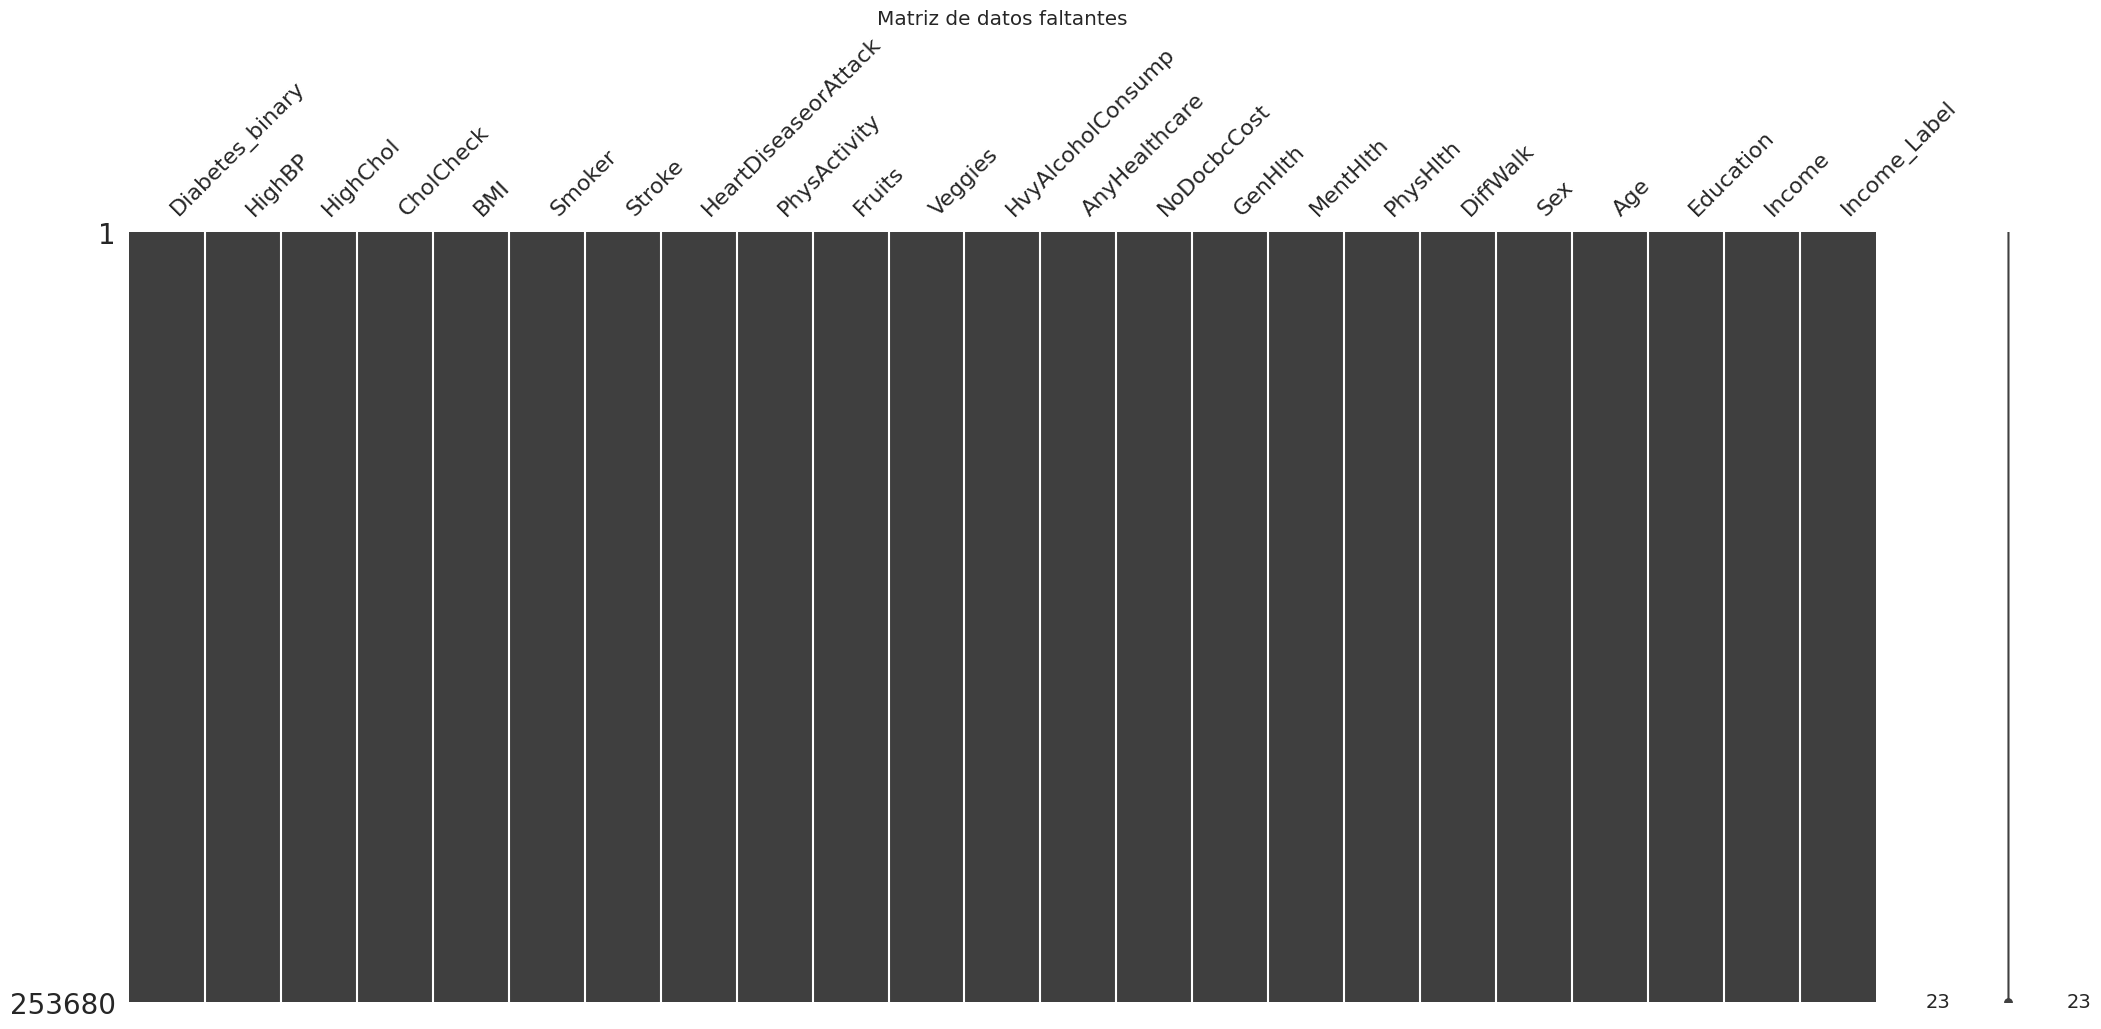

In [ ]:
# Instala la librería missingno
import missingno as msno

# Visualización de datos faltantes utilizando missingno
msno.matrix(df_diabetes)
plt.title('Matriz de datos faltantes')
plt.show()

In [ ]:
# Detectar datos duplicados
duplicates = df_diabetes[df_diabetes.duplicated()]

# Mostrar los datos duplicados
print("Cantidad de filas duplicadas:", duplicates.shape[0])
print(duplicates)

Cantidad de filas duplicadas: 24206
        Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
1242                1.0     1.0       1.0        1.0  27.0     1.0     0.0   
1563                0.0     0.0       0.0        1.0  21.0     1.0     0.0   
2700                0.0     0.0       0.0        1.0  32.0     0.0     0.0   
3160                0.0     0.0       0.0        1.0  21.0     0.0     0.0   
3332                0.0     0.0       0.0        1.0  24.0     0.0     0.0   
...                 ...     ...       ...        ...   ...     ...     ...   
253492              1.0     1.0       1.0        1.0  33.0     0.0     0.0   
253550              0.0     0.0       0.0        1.0  25.0     0.0     0.0   
253563              0.0     0.0       1.0        1.0  24.0     1.0     0.0   
253597              0.0     0.0       0.0        1.0  24.0     0.0     0.0   
253638              0.0     0.0       0.0        1.0  24.0     0.0     0.0   

        HeartDiseaseorAttac

In [ ]:
# Seleccionar solo columnas numéricas para el cálculo del IQR
numeric_columns = df_diabetes.select_dtypes(include=np.number)

# Calcular el rango intercuartílico (IQR)
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers
outliers = ((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))).any(axis=1)

# Mostrar los outliers
outliers_df = df_diabetes[outliers]
print("Cantidad de outliers:", outliers_df.shape[0])
print(outliers_df)

Cantidad de outliers: 166811
        Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
6                   0.0     1.0       0.0        1.0  30.0     1.0     0.0   
7                   0.0     1.0       1.0        1.0  25.0     1.0     0.0   
...                 ...     ...       ...        ...   ...     ...     ...   
253675              0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677              0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678              0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  Phys